In [3]:
import pandas as pd
df=pd.read_csv("rice.csv")
df

,Area,Perimeter,Major Axis Length,Minor Axis Length,Eccentricity,Convex Area,Extent,Aspect Ratio,Compactness,Roundness,class
0,5031.0,295.137083,111.810371,58.412422,0.852686,5171.5,0.736388,0.544643,17.313834,0.725799,arborio
1,15102.5,527.227485,209.719940,94.610435,0.892460,15481.5,0.584417,0.824859,18.405484,0.682751,ipsala
2,8301.5,382.149276,144.123428,74.225311,0.857183,8593.0,0.709348,0.588652,17.591769,0.714332,arborio
3,8479.0,374.676186,138.285583,78.884933,0.821333,8686.0,0.671072,1.400000,16.556462,0.759001,arborio
4,15624.5,542.575681,205.537155,101.372452,0.869912,16294.5,0.718831,0.497608,18.841459,0.666953,ipsala
...,...,...,...,...,...,...,...,...,...,...,...
77995,8125.0,579.386864,203.525162,61.531612,0.953204,10434.0,0.474065,0.441624,41.315586,0.304156,Goan Asago
77996,3238.0,371.480229,115.894455,45.182369,0.920875,4182.0,0.628494,0.410714,42.618147,0.294860,Goan Asago
77997,3664.5,389.865005,123.845177,47.349751,0.924026,4733.5,0.603806,0.428571,41.477616,0.302968,Goan Asago
77998,8698.5,631.428493,216.747681,62.857948,0.957025,11219.5,0.457358,0.435407,45.835712,0.274161,Goan Asago


In [5]:
x=df.drop(columns=['class'])
y=df['class']

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.transform(x_test)

LOGISTIC REGRESSION MODEL REFERENCE:-https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, solver='lbfgs', max_iter=5000, tol=1e-4)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=0)

DECISION TREE MODEL

In [19]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier(random_state=0)
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

SVM MODEL

In [22]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', random_state=0)
svm_model.fit(X_train, y_train)

SVC(random_state=0)

GUASSIAN MODEL

In [25]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

MODEL PREDICTION

In [28]:
classifierPrediction=classifier.predict(X_test) #Logistic regression Model
tree_modelPrediction=tree_model.predict(X_test) #Decision tree Model
svm_modelPrediction=svm_model.predict(X_test) #SVM Model
gnbPrediction=gnb.predict(X_test) #Gaussian Model

PERFORMANCE REPORT

In [30]:
#LOGISTIC REGRESSION MODEL
from sklearn.metrics import classification_report
print(classification_report(classifierPrediction,y_test))

              precision    recall  f1-score   support

  Goan Asago       1.00      1.00      1.00       616
     arborio       0.96      0.97      0.96      2955
     basmati       0.96      0.98      0.97      2979
      ipsala       0.99      1.00      0.99      2932
     jasmine       0.97      0.96      0.96      3053
   karacadag       0.97      0.97      0.97      3065

    accuracy                           0.97     15600
   macro avg       0.98      0.98      0.98     15600
weighted avg       0.97      0.97      0.97     15600



In [33]:
#DECISION TREE MODEL
from sklearn.metrics import classification_report
print(classification_report(tree_modelPrediction,y_test))

              precision    recall  f1-score   support

  Goan Asago       1.00      1.00      1.00       615
     arborio       0.95      0.95      0.95      2966
     basmati       0.97      0.96      0.97      3034
      ipsala       0.99      0.99      0.99      2941
     jasmine       0.96      0.96      0.96      3002
   karacadag       0.96      0.96      0.96      3042

    accuracy                           0.97     15600
   macro avg       0.97      0.97      0.97     15600
weighted avg       0.97      0.97      0.97     15600



In [35]:
#SVM MODEL
from sklearn.metrics import classification_report
print(classification_report(svm_modelPrediction,y_test))

              precision    recall  f1-score   support

  Goan Asago       1.00      1.00      1.00       616
     arborio       0.96      0.97      0.97      2931
     basmati       0.98      0.98      0.98      3014
      ipsala       0.99      1.00      1.00      2929
     jasmine       0.97      0.97      0.97      3027
   karacadag       0.98      0.97      0.97      3083

    accuracy                           0.98     15600
   macro avg       0.98      0.98      0.98     15600
weighted avg       0.98      0.98      0.98     15600



In [37]:
#GUASSIAN BAYES THEOREM MODEL
from sklearn.metrics import classification_report
print(classification_report(gnbPrediction,y_test))

              precision    recall  f1-score   support

  Goan Asago       1.00      0.99      1.00       620
     arborio       0.96      0.97      0.96      2943
     basmati       0.96      0.97      0.96      2957
      ipsala       0.99      1.00      0.99      2915
     jasmine       0.97      0.95      0.96      3093
   karacadag       0.97      0.96      0.97      3072

    accuracy                           0.97     15600
   macro avg       0.97      0.97      0.97     15600
weighted avg       0.97      0.97      0.97     15600



In [49]:
categories = ["Goan Asago","arborio", "basmati", "ipsala", "jasmine", "karacadag"]

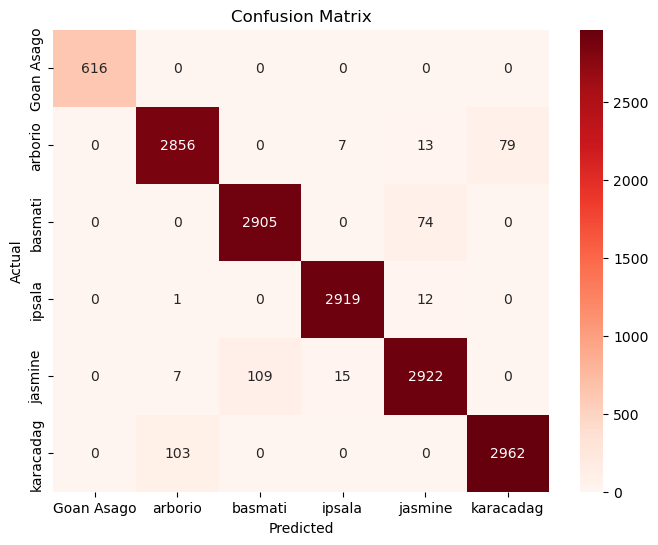

In [51]:
#CONFUSION MATRIX OF LOGISTIC REGRESSION
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(classifierPrediction,y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

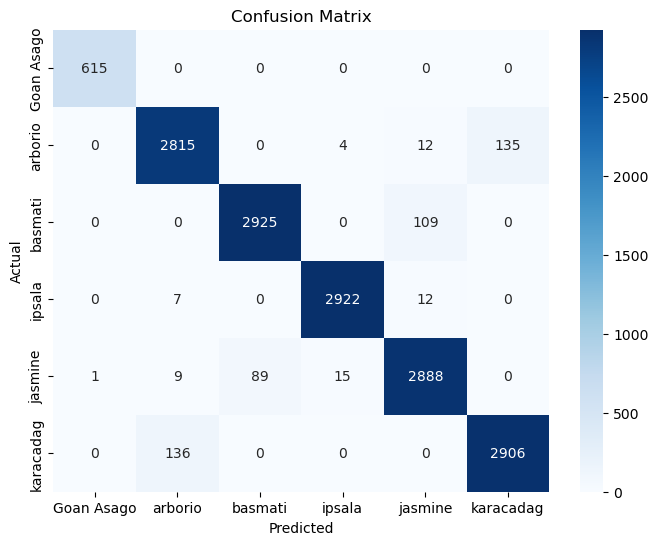

In [57]:
#CONFUSION MATRIX OF DECISION TREE MODEL
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(tree_modelPrediction,y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

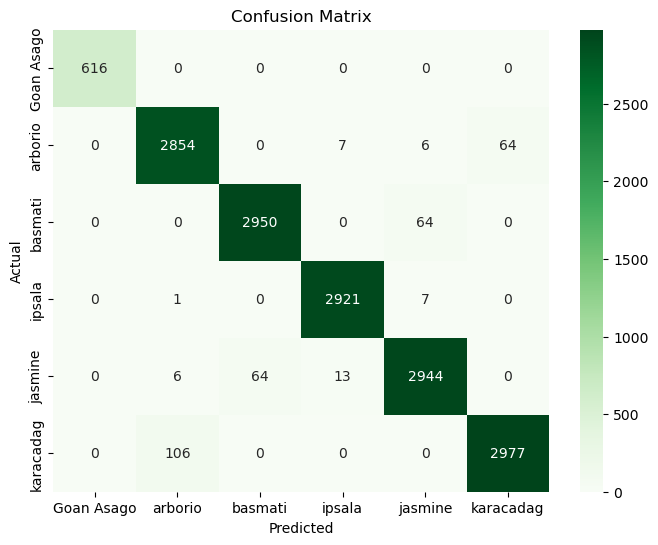

In [53]:
#CONFUSION MATRIX OF SVM MODEL
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(svm_modelPrediction,y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

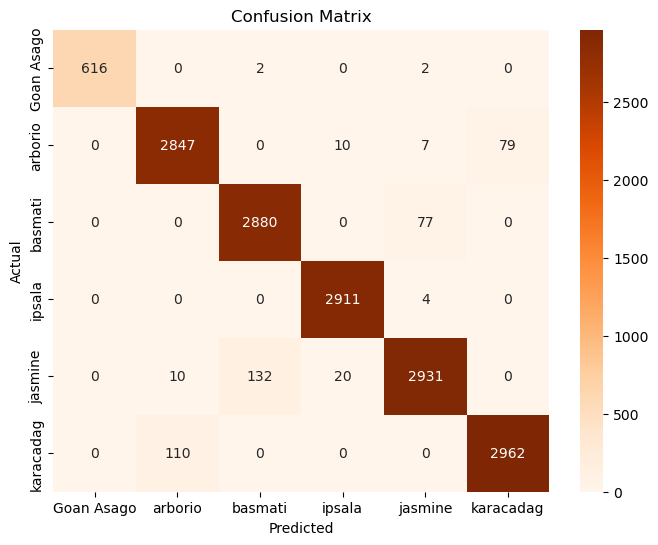

In [55]:
#CONFUSION MATRIX OF SVM MODEL
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(gnbPrediction,y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [47]:
import joblib
joblib.dump(classifier, "logistic_model.pkl")
joblib.dump(tree_model, "Decision_Tree_model.pkl")
joblib.dump(svm_model, "SVM_model.pkl")
joblib.dump(gnb, "Gaussian_model.pkl")

['Gaussian_model.pkl']